## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 4
#### Nombre y Apellido: Fabian Catuogno

***
## Filtrado


<div class="alert alert-block alert-info">
<b>1)</b> Para el siguiente filtro digital se pide:

</div>

 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N = [3; 5]

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./TP4_1_a.jpeg" align="left" width="50%" /> <img src="./TP4_1_b.jpeg" align="rigth" width="50%" />


   b) Corrobore su respuesta mediante la simulación computacional


In [3]:
## Inicialización del Notebook del TP4

import numpy as np
from pandas import DataFrame
from IPython.display import HTML
from scipy import signal as sig
import scipy.io as sio

# Insertar aquí el código para inicializar tu notebook
########################################################

import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

import matplotlib.pyplot as plt

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

def vertical_flaten(a):
    
    return a.reshape(a.shape[0],1)


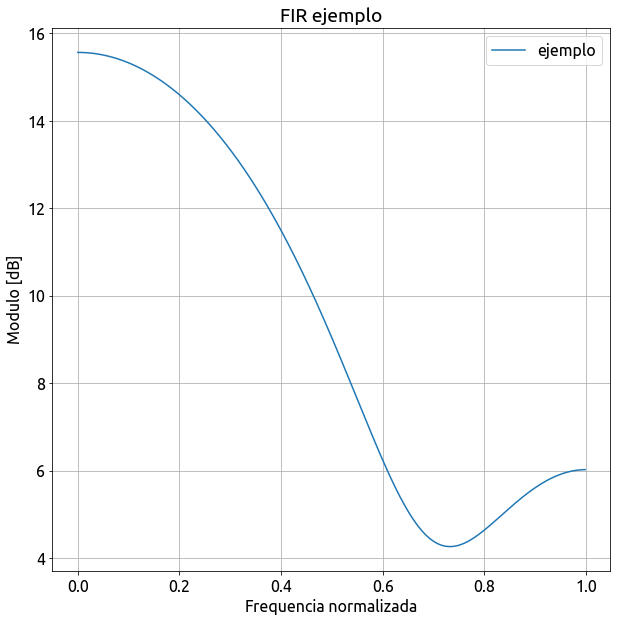

In [4]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

ww, hh = sig.freqz(np.array([1, 2, 3]), 1)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='ejemplo')

plt.title('FIR ejemplo')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()


<div class="alert alert-block alert-info">
<b>2)</b> Para el siguiente filtro digital se pide:

</div>


$$ h(k) = (-1, 1) $$
 


   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./escriba_aqui.png" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante simulación computacional


In [3]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>3)</b> Para el siguiente filtro digital se pide:

</div>


<img src="./comb.png" align="center" width="30%" /> 


Para $N= (2; 4)$ y $b = -1$

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./escriba_aqui.png" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante simulación computacional


In [4]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################



<div class="alert alert-block alert-info">
<b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div>

 - Ruido causado por el movimiento de los electrodos (Alta frecuencia)
 - Ruido muscular (Alta frecuencia)
 - Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div>


<img src="./latidos_tiempo.png" align="center" width="80%" /> 

<img src="./latido_promedio.png" align="center" width="80%" /> 

<img src="./latidos_espectro.png" align="center" width="80%" /> 


### Archivo *ECG_TP4.mat*
(variables)
 - **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 - **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos
 
a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a *suavidad* de los trazos y nivel isoeléctrico nulo.
 

fc0 =  0.8333333333333334
fc1 =  27.5
att_min = 9.353653 @ fs1= 134.16666666666669 Hz


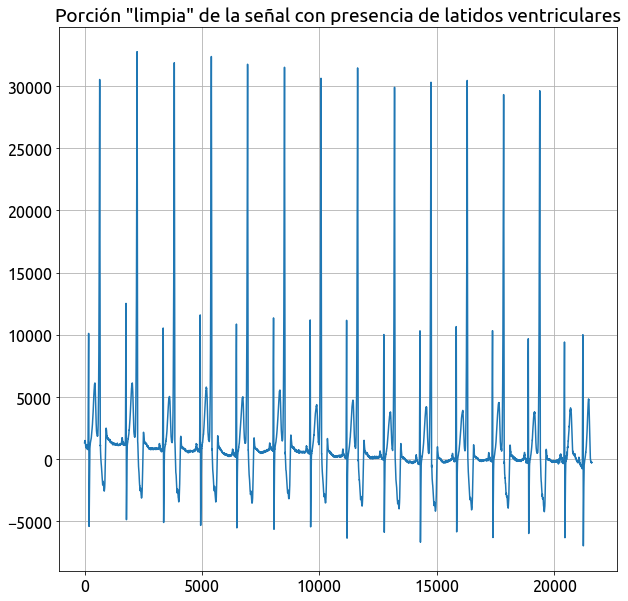

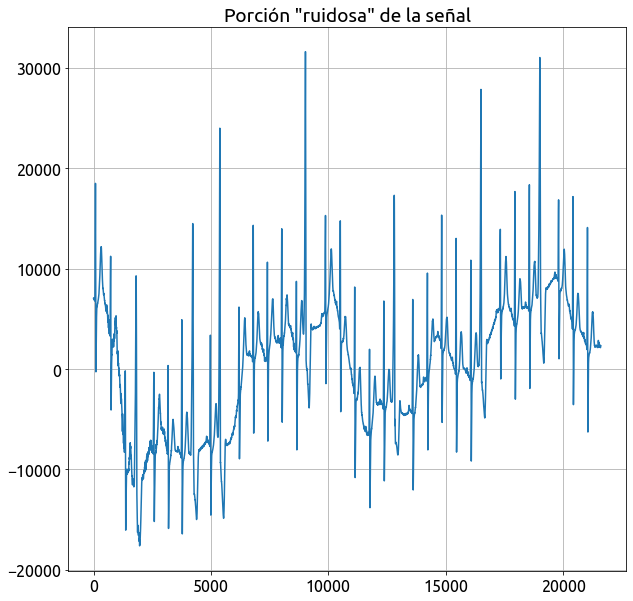

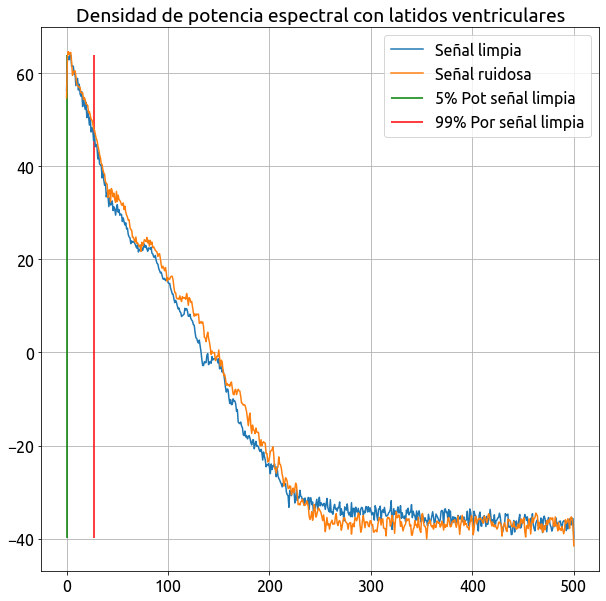

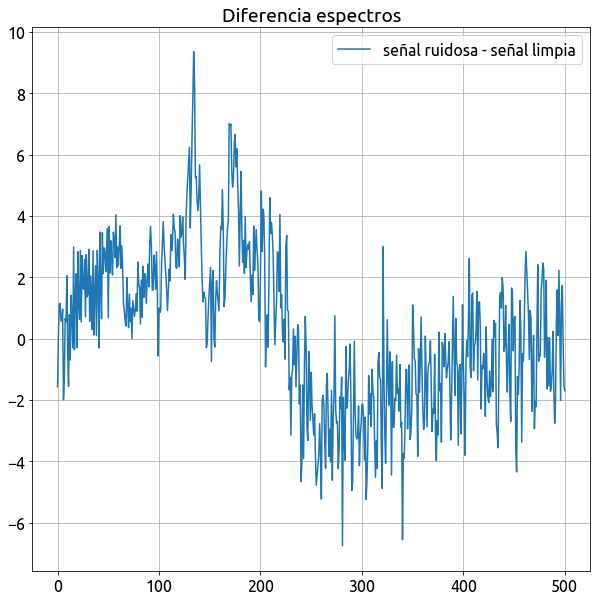

In [6]:
fs = 1000

variables = sio.whosmat('ECG_TP4.mat') #Lista variable
archivo = sio.loadmat('ECG_TP4.mat')

ecg_lead = archivo['ecg_lead']

#Se extrae porcion limpia de la señal donde también hay presentes latidos ventriculares
extracto_conventricular = ecg_lead[30000:51600]
#Se extrae porcion ruidosa de la señal
extracto_ruidoso = ecg_lead[940420:962020]

plt.close('all')
plt.figure()
plt.plot(extracto_conventricular)
plt.title('Porción "limpia" de la señal con presencia de latidos ventriculares' )
plt.grid()

plt.figure()
plt.plot(extracto_ruidoso)
plt.title('Porción "ruidosa" de la señal' )
plt.grid()


frecw,Pxxw = sig.welch(extracto_conventricular,fs,nperseg=1200,noverlap=0,scaling='spectrum',axis=0)
plt.figure(3)
#plt.plot(frecw,Pxxw) #veces
plt.plot(frecw,10*np.log10(Pxxw),label='Señal limpia') #log
plt.title('Densidad de potencia espectral con latidos ventriculares' )


#Calculo comienzo de la banda de paso 
i = 0
pot_acum = 0
criterio_HPF = np.sum(Pxxw)*0.05
while pot_acum + Pxxw[i]< criterio_HPF:
    pot_acum += Pxxw[i]
    i+=1
fc0 = frecw[i]
    
#Calculo fin de la banda de paso     
i = 0
pot_acum = 0
criterio_LPF = np.sum(Pxxw)*0.99
while pot_acum + Pxxw[i] < criterio_LPF:
    pot_acum += Pxxw[i]
    i+=1
fc1 = frecw[i]

plt.vlines(fc0,np.min(10*np.log10(Pxxw)),np.max(10*np.log10(Pxxw)),label='5% Pot señal limpia',color='g')
plt.vlines(fc1,np.min(10*np.log10(Pxxw)),np.max(10*np.log10(Pxxw)),label='99% Por señal limpia',color='r')

print('fc0 = ',fc0)
print('fc1 = ',fc1)

frecwr,Pxxwr = sig.welch(extracto_ruidoso,fs,nperseg=1200,noverlap=0,scaling='spectrum',axis=0)
plt.figure(3)
plt.plot(frecwr,10*np.log10(Pxxwr),label='Señal ruidosa')
plt.legend()
plt.grid()

#Diferencia espectros
diferencia = 10*np.log10(Pxxwr)-10*np.log10(Pxxw)
plt.figure()
plt.plot(frecw,diferencia,label='señal ruidosa - señal limpia')
plt.title('Diferencia espectros')
plt.legend()
plt.grid()

att_min = np.max(diferencia)
fs1 = frecwr[np.argmax(diferencia)]

print('att_min =',att_min,'@ fs1=',fs1,'Hz')

# Defina la plantilla del filtro

fs0 = 0.1 # fin de la banda de detenida 0
fc0 = 1   # comienzo de la banda de paso
fc1 = fc1 # fin de la banda de paso
fs1 = 130 # comienzo de la banda de detenida 1


b) ¿Cómo obtuvo dichos valores? 
 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> <p>Para el calculo del fin de la banda de detenida y comienzo de la banda de paso se analizo el espectro limpio, y se contabilizó hasta que frecuencia se acumulaba um 5% de la frecuencia, para de esa manera tratar de afectar al minimo la señal limpia. El valor obtenido fue 0.8Hz. Se llevará a la práctica como valor de comienzo de la banda de paso 1Hz ya que claramente la deriva del nivel de continua son frecuencia sub-hertz y buscamos que el filtro no tenga que ser tan exigente, ya que deberemos colocar un fs0 muy cercano. En este primer experimento lo colocaremos em 0.1dB con una atenuacion de 20dB considerando que es una decada no resultaría un rendimiendo tan exigente. </p>
    <p> Para el calculo de fin de banda de paso buscamos la frecuencia donde se lleva acumulada el 99% de la potencia de la señal limpia. Dandonos dicho valor en 27,5Hz. Para el calculo del inicio de la banda de detenida calculamos el espectro de la porcion de la señal ruidosa. Al realizar la diferencia entre ambas podemos ver que l espectro con ruido se presenta  unos 10dB por encima del limpio en una frecuencia cerca a los 130Hz. Se tomarán dichos valores para esta primer plantilla
</div>

c) Diseñe **al menos** dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño
  

<ipython-input-31-c1de49ee10dd>:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ww, 20 * np.log10(abs(hh)), label='IIR_HPF')


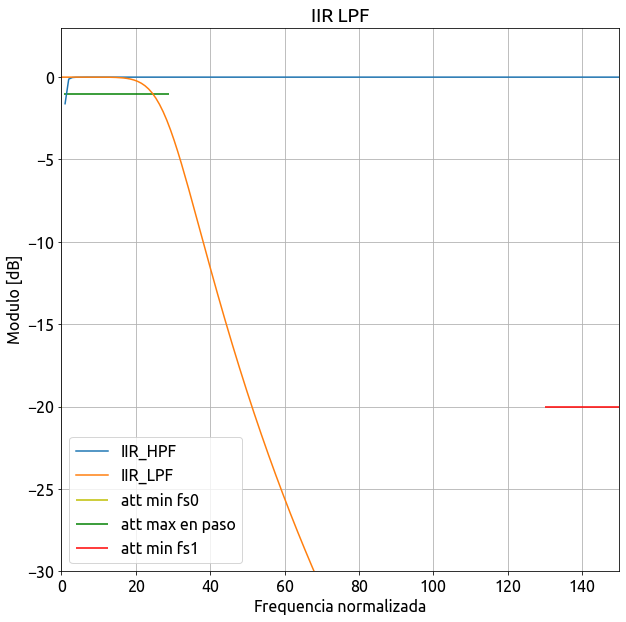

In [31]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
fs = 1000

fs0 = 0.1 # fin de la banda de detenida 0
fc0 = 0.8   # comienzo de la banda de paso
fc1 = 29 # fin de la banda de paso - Se corre ligeramente a una frec mayor de la calculada
fs1 = 130 # comienzo de la banda de detenida 1

att_min_fs0 = 20 #db
ripple_max = 1 #dB - finalmente no influye en IIR ya que se plantean filtros butter
att_min_fs1 = 20 #db - Valor modificado tras pruebas de un primer experimento

#Se resuelve pasabanda colocando en cascada un LPF y un HPF

#IIR HPF
#Se plantea un segundo orden para cumplir plantilla
num_hpf_iir,den_hpf_iir= sig.iirfilter(2, Wn=fc0, rp=ripple_max, rs=att_min_fs0, btype='highpass', analog=False, ftype='butter', output='ba', fs=fs)
ww, hh = sig.freqz(num_hpf_iir,den_hpf_iir,fs=fs)

plt.figure()
plt.plot(ww, 20 * np.log10(abs(hh)), label='IIR_HPF')
plt.hlines(-att_min_fs0,0,fs0,color='y',label='att min fs0')
plt.hlines(-ripple_max,fc0,fc1,color='g',label='att max en paso')
plt.title('IIR LPF')
plt.xlabel('Frequencia normalizada')

#IRR LPF
#Inicialemnte se planteó un orden 2 para cumplir lo planteado por la plantilla, luego de ver los resultados 
#experimentales se decidio mejorarlo llevandolo a un orden 4
num_lpf_iir,den_lpf_iir= sig.iirfilter(4, Wn=fc1, rp=ripple_max, rs=att_min_fs1, btype='lowpass', analog=False, ftype='butter', output='ba', fs=fs)
ww, hh = sig.freqz(num_lpf_iir,den_lpf_iir,fs=fs)

plt.plot(ww, 20 * np.log10(abs(hh)), label='IIR_LPF')
plt.hlines(-att_min_fs1,fs1,fs/2,color='r',label='att min fs1')
plt.title('IIR LPF')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.xlim(0,150)
plt.ylim(-30,3)
plt.grid(which='both', axis='both')
plt.legend()


d) Evalúe el rendimiento de los filtros que haya diseñado: 

 1. Verifique que filtra las señales interferentes
 2. Verifique que es inocuo en las zonas donde no hay interferentes



(array([300000., 312000.]), [4000, 5500], [10000.0, 11000.0])


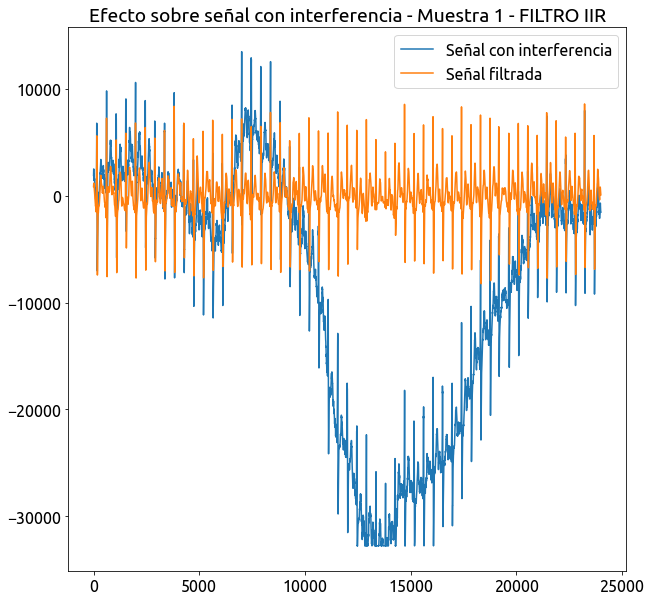

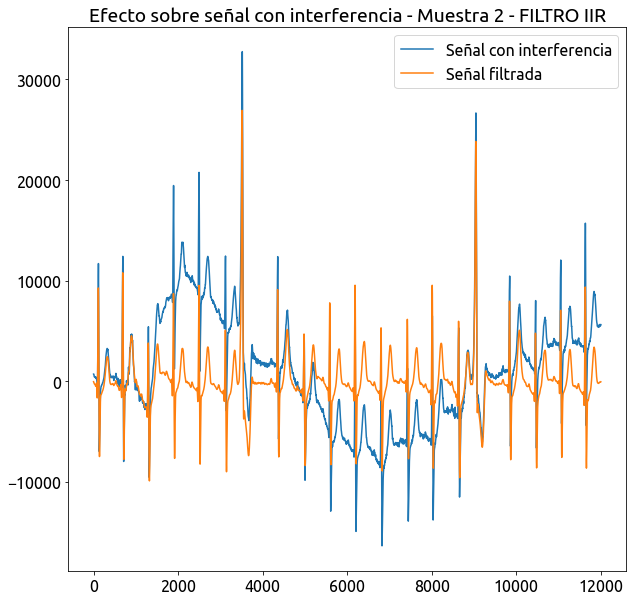

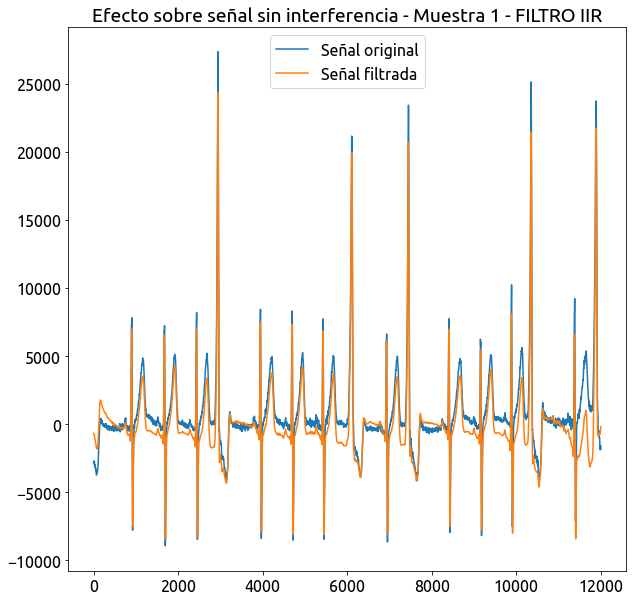

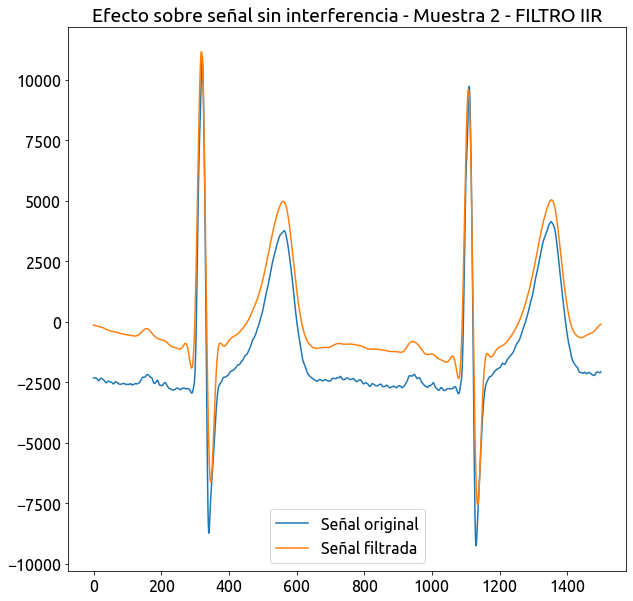

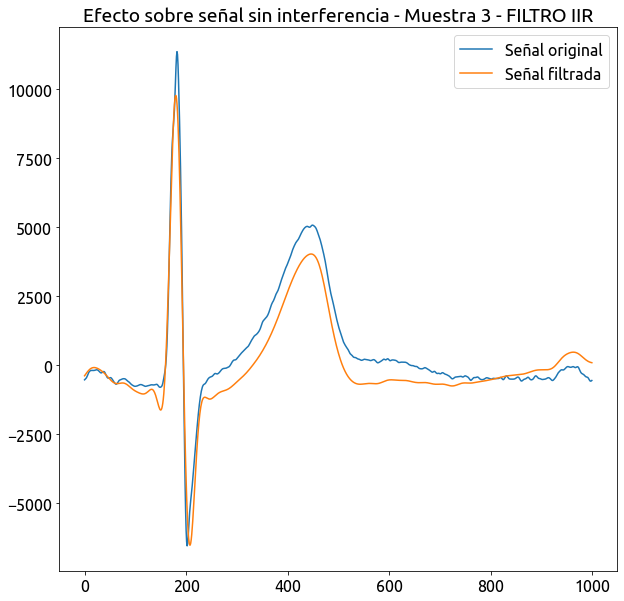

In [46]:

# Segmentos de interés #
########################
# Puede tomar como referencia los siguientes segmentos, aunque si lo considera, también
# puede incluir otros que considere importantes para evaluar el rendimiento.

zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )


zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#
# Analisis con interferentes
#
muestra1_con_interf = ecg_lead[int(zonas_con_interf_baja_frec[0][0]):int(zonas_con_interf_baja_frec[0][1])]
muestra2_con_interf = ecg_lead[int(zonas_con_interf_baja_frec[1][0]):int(zonas_con_interf_baja_frec[1][1])]

plt.figure(1)
plt.plot(muestra1_con_interf,label='Señal con interferencia')
plt.title('Efecto sobre señal con interferencia - Muestra 1 - FILTRO IIR')

plt.figure(2)
plt.plot(muestra2_con_interf,label='Señal con interferencia')
plt.title('Efecto sobre señal con interferencia - Muestra 2 - FILTRO IIR')

#Filtrado de la muestra 1
señal_filtrada = sig.filtfilt(num_hpf, den_hpf, muestra1_con_interf,axis=0)
señal_filtrada = sig.filtfilt(num_lpf, den_lpf, señal_filtrada,axis=0)

plt.figure(1)
plt.plot(señal_filtrada,label='Señal filtrada')
plt.legend()

#Filtrado de la muestra 2
señal_filtrada = sig.filtfilt(num_hpf, den_hpf, muestra2_con_interf,axis=0)
señal_filtrada = sig.filtfilt(num_lpf, den_lpf, señal_filtrada,axis=0)

plt.figure(2)
plt.plot(señal_filtrada,label='Señal filtrada')
plt.legend()

#
# Analisis con interferentes
#
print(zonas_sin_interf)
muestra1_sin_interf = ecg_lead[int(zonas_sin_interf[0][0]):int(zonas_sin_interf[0][1])]
muestra2_sin_interf = ecg_lead[int(zonas_sin_interf[1][0]):int(zonas_sin_interf[1][1])]
muestra3_sin_interf = ecg_lead[int(zonas_sin_interf[2][0]):int(zonas_sin_interf[2][1])]

plt.figure(3)
plt.plot(muestra1_sin_interf,label='Señal original')
plt.title('Efecto sobre señal sin interferencia - Muestra 1 - FILTRO IIR')

plt.figure(4)
plt.plot(muestra2_sin_interf,label='Señal original')
plt.title('Efecto sobre señal sin interferencia - Muestra 2 - FILTRO IIR')

plt.figure(5)
plt.plot(muestra3_sin_interf,label='Señal original')
plt.title('Efecto sobre señal sin interferencia - Muestra 3 - FILTRO IIR')

#Filtrado de la muestra 1
señal_filtrada = sig.filtfilt(num_hpf, den_hpf, muestra1_sin_interf,axis=0)
señal_filtrada = sig.filtfilt(num_lpf, den_lpf, señal_filtrada,axis=0)

plt.figure(3)
plt.plot(señal_filtrada,label='Señal filtrada')
plt.legend()

#Filtrado de la muestra 2
señal_filtrada = sig.filtfilt(num_hpf, den_hpf, muestra2_sin_interf,axis=0)
señal_filtrada = sig.filtfilt(num_lpf, den_lpf, señal_filtrada,axis=0)

plt.figure(4)
plt.plot(señal_filtrada,label='Señal filtrada')
plt.legend()

#Filtrado de la muestra 3
señal_filtrada = sig.filtfilt(num_hpf, den_hpf, muestra3_sin_interf,axis=0)
señal_filtrada = sig.filtfilt(num_lpf, den_lpf, señal_filtrada,axis=0)

plt.figure(5)
plt.plot(señal_filtrada,label='Señal filtrada')
plt.legend()



<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> Utilice las siguientes metodologías <b>no lineales</b> de estimación-substracción para la remoción de la interferencia de línea de base, y compare con las técnicas lineales del punto anterior en las mismas regiones. Luego discuta las ventajas y desventajas de cada técnica.
</div>

a) Estimación del movimiento de línea de base a partir del filtrado de mediana. A partir de la siguiente estimación del movimiento de línea de base 

$$ \hat{b} = \mathop{med}_{600} \{ \mathop{med}_{200} \{s\} \} $$

Donde $s$ representa la señal de ECG a partir de la que estimamos el movimiento de la línea de base $ \hat{b}$. El operador $\mathop{med}_{200}$ calcula muestra a muestra la mediana en los 200 ms previos a la muestra actual. Luego dicha estimación la substraemos para estimar la actividad eléctrica cardíaca $\hat{x}$

$$ \hat{x} = s - \hat{b} $$


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la implementación del <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#median-filter">filtro de mediana provista en <b>scipy.signal</b></a>
</div>

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. A partir de las detecciones provistas, puede estimar aproximadamente el nivel isoeléctrico, es decir el momento donde la actividad eléctrica cardíaca es **nula**. El intervalo entre la onda P y Q, es un buen momento para estimar las características de las señales interferentes que originan el movimiento de la línea de base.

<img src="./pq.png" align="center" width="80%" /> 

Para la localización del segmento PQ puede valerse de la localización de cada latido (líneas rojas verticales) y a partir de la misma, anticipar un tiempo adecuado de manera tal de no incluir la onda P ni Q. Puede ayudarse con el latido promedio de un latido normal para establecer dicho intervalo.

Recuerde que la señal de línea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que debería remuestrear dicha señal (puede usar la función de interpolación spline para ello).

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la función de interpolación <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html">spline <b>scipy.interpolate.CubicSpline</b></a>
</div>

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>6)</b> Para la señal de ECG provista junto con este documento, aplique el concepto de <b>filtro adaptado</b> y otras técnicas de filtrado digital para diseñar un detector de latidos. Los patrones provistos son:

</div>


 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Revise el concepto de filtro adaptado en <a href="http://en.wikipedia.org/wiki/Matched_filter">Wikipedia</a>, o la bibliografía de la materia (Porat 14.4.9).
</div>

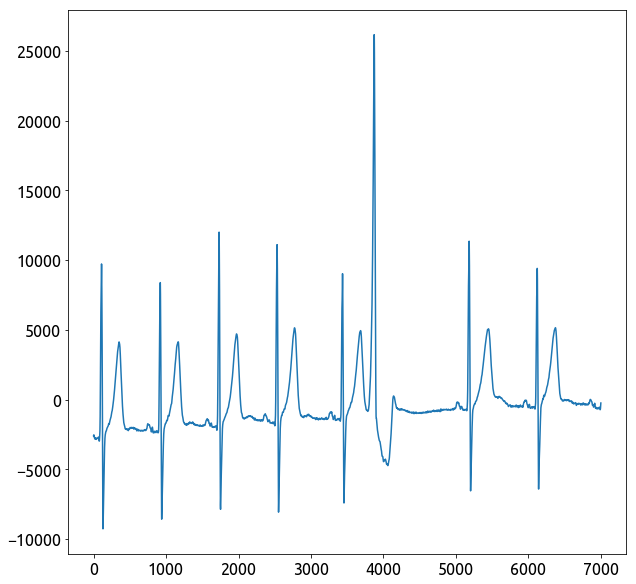

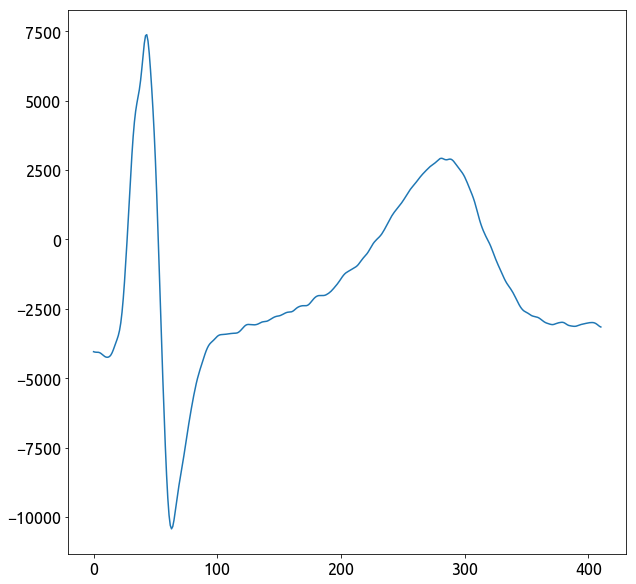

In [54]:
import scipy.io as sio

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])

plt.figure(1)
plt.plot(ecg_one_lead[5000:12000])

plt.figure(2)
plt.plot(hb_1)



a) Explique conceptualmente cómo podría realizar un detector de latidos con la señal resultante del filtro adaptado. Discuta la utilidad y limitaciones de este método. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   
   b) Realice la detección de los latidos, comparando las detecciones obtenidas con las que se incluyen en la variable **qrs_detections**. Proponga alguna métrica para cuantificar las diferencias.


In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

